In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)


In [16]:
df = pd.read_csv("loan_data.csv")
y = df.pop("not.fully.paid")

In [17]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [18]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [19]:
df['purpose'].astype('category')

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: category
Categories (7, object): [all_other, credit_card, debt_consolidation, educational, home_improvement, major_purchase, small_business]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 972.9+ KB


In [21]:
df_enc = pd.get_dummies(df, columns = ['credit.policy','purpose'])

In [22]:
df_enc.nunique()

int.rate                       249
installment                   4788
log.annual.inc                1987
dti                           2529
fico                            44
days.with.cr.line             2687
revol.bal                     7869
revol.util                    1035
inq.last.6mths                  28
delinq.2yrs                     11
pub.rec                          6
credit.policy_0                  2
credit.policy_1                  2
purpose_all_other                2
purpose_credit_card              2
purpose_debt_consolidation       2
purpose_educational              2
purpose_home_improvement         2
purpose_major_purchase           2
purpose_small_business           2
dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_enc, y, test_size=0.2)

In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8413361169102297

In [25]:
def fit_tree(train, test, y_train, y_test, scaler, max_depth, 
             max_feature = 1, min_sample_split = 4, criterion = 'entropy'):
    train_sc = scaler.fit_transform(train)
    test_sc = scaler.tranform(test)
    dt = DecisionTreeClassifier(max_depth = max_depth, max_feature = max_feature, min_sample_split = min_sample_split, criterion = criterion)
    dt.fit(train_sc, y_train)
    y_pred = dt.predict(test_sc)
    print(accuracy_score(y_test, y_pred))
    
    

In [37]:
def fit_predict(train, test, y_train, y_test, scaler, max_depth, 
                criterion = 'entropy', max_features = 1, min_samples_split = 4):
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)        
    dt = DecisionTreeClassifier(criterion = criterion, max_depth=max_depth, 
                                random_state=42, max_features=max_features,
                               min_samples_split=min_samples_split)
    dt.fit(train_scaled, y_train)
    y_pred = dt.predict(test_scaled)
    print(accuracy_score(y_test, y_pred))
    


In [35]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.732776617954071


### Max Depth Tuning

In [38]:
max_depth = []
for i in range(1, 23):
    print("Accuracy using Max Depth =", i, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), i)

#Print("Max Depth:",max(max_depth))

Accuracy using Max Depth = 1: 0.8408141962421712
Accuracy using Max Depth = 2: 0.8408141962421712
Accuracy using Max Depth = 3: 0.8408141962421712
Accuracy using Max Depth = 4: 0.8408141962421712
Accuracy using Max Depth = 5: 0.8413361169102297
Accuracy using Max Depth = 6: 0.8329853862212944
Accuracy using Max Depth = 7: 0.8382045929018789
Accuracy using Max Depth = 8: 0.8293319415448852
Accuracy using Max Depth = 9: 0.8256784968684759
Accuracy using Max Depth = 10: 0.8209812108559499
Accuracy using Max Depth = 11: 0.8178496868475992
Accuracy using Max Depth = 12: 0.8225469728601252
Accuracy using Max Depth = 13: 0.8147181628392485
Accuracy using Max Depth = 14: 0.8131524008350731
Accuracy using Max Depth = 15: 0.7990605427974948
Accuracy using Max Depth = 16: 0.802713987473904
Accuracy using Max Depth = 17: 0.7760960334029228
Accuracy using Max Depth = 18: 0.8016701461377871
Accuracy using Max Depth = 19: 0.7875782881002088
Accuracy using Max Depth = 20: 0.7781837160751566
Accuracy u

#### MaxDepth is 5, Accuracy is 0.8413361169102297
Accuracy using Max Depth = 5: 0.8413361169102297

## Max Features Split

In [39]:
for i in np.arange(0.1, 1.0, 0.1):
    print("Accuracy using Max Feature =", i, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), max_depth = 5, max_features= i)

Accuracy using Max Feature = 0.1: 0.8402922755741128
Accuracy using Max Feature = 0.2: 0.8319415448851775
Accuracy using Max Feature = 0.30000000000000004: 0.8392484342379958
Accuracy using Max Feature = 0.4: 0.8387265135699373
Accuracy using Max Feature = 0.5: 0.8366388308977035
Accuracy using Max Feature = 0.6: 0.8335073068893528
Accuracy using Max Feature = 0.7000000000000001: 0.8382045929018789
Accuracy using Max Feature = 0.8: 0.837160751565762
Accuracy using Max Feature = 0.9: 0.8308977035490606


#### Max Feature = 0.1, Accuracy is 0.840 which is 1 feature per tree that not possible.
###### Also the accuracy is reduced when controling Max Feature Split.
###### So not using this parameter.

## Min Sample Split

In [46]:
for i in range(2, 10):
    print("Accuracy using Min Sample Split =", i, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), max_depth = 5, min_samples_split= i)


Accuracy using Min Sample Split = 2: 0.8413361169102297
Accuracy using Min Sample Split = 3: 0.8413361169102297
Accuracy using Min Sample Split = 4: 0.8413361169102297
Accuracy using Min Sample Split = 5: 0.8413361169102297
Accuracy using Min Sample Split = 6: 0.8413361169102297
Accuracy using Min Sample Split = 7: 0.8413361169102297
Accuracy using Min Sample Split = 8: 0.8413361169102297
Accuracy using Min Sample Split = 9: 0.8413361169102297


#### Min Sample Split - For alll the values, it gives same result. So dont need to consider



## Criterion tuning

In [47]:
# Using my original result
for i in ['gini', 'entropy']:
    print("Accuracy using Criterion =", i, end = ': ')
    fit_predict(X_train, X_test, y_train, y_test, StandardScaler(), max_depth = 5, 
                criterion = i)

Accuracy using Criterion = gini: 0.8413361169102297
Accuracy using Criterion = entropy: 0.8413361169102297


 #### Criterion - For alll the values, it gives same result. So dont need to consider

In [48]:
def create_poly(train, test, degree):
    poly = PolynomialFeatures(degree = degree)
    train_poly = poly.fit_transform(train)
    test_poly = poly.fit_transform(test)
    return train_poly, test_poly

In [49]:
for degree in [1, 2, 3, 4]:
    train_poly, test_poly = create_poly(X_train, X_test, degree)
    print('Polynomial Degree:', degree)
    fit_predict(train_poly, test_poly, y_train, y_test, StandardScaler(), max_depth = 5)
    print(10*'-')
    
train_poly, test_poly = create_poly(X_train, X_test, 2)

Polynomial Degree: 1
0.837160751565762
----------
Polynomial Degree: 2
0.8408141962421712
----------
Polynomial Degree: 3
0.8408141962421712
----------
Polynomial Degree: 4
0.837160751565762
----------


In [57]:

train_poly, test_poly = create_poly(X_train, X_test, 2)

fit_predict(train_poly, test_poly, y_train, y_test, StandardScaler(), max_depth = 5)


0.8408141962421712


#### With Polynomial, No improvement is there

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RandomForest Accuracy:",accuracy_score(y_test, y_pred))

RandomForest Accuracy: 0.8402922755741128


In [52]:
rf.base_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params = {'n_estimators': [200,500,700], 'max_depth': [4, 5, 8], 'min_samples_leaf': [2, 3, 5]}

In [55]:
gsv = GridSearchCV(rf, params, verbose = 3) 

In [56]:
gsv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=4, min_samples_leaf=2, n_estimators=200 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=2, n_estimators=200, score=0.840, total=   1.7s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=200 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=2, n_estimators=200, score=0.840, total=   1.7s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=200 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=2, n_estimators=200, score=0.840, total=   1.8s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=2, n_estimators=200, score=0.840, total=   1.7s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=2, n_estimators=200, score=0.839, total=   1.7s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=2, n_estimators=500, score=0.840, total=   4.3s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=2, n_estimators=500, score=0.840, total=   4.2s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=2, n_estimators=500, score=0.840, total=   4.1s
[CV] max_depth=4, min_samples_leaf=2, n_estimators=500 ...............
[CV]  max_depth=4, min_samples_leaf=2, n_estimators=500, score=0.840, 

[CV]  max_depth=5, min_samples_leaf=2, n_estimators=700, score=0.840, total=   6.9s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=700 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=700, score=0.840, total=   6.8s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=700 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=700, score=0.840, total=   6.5s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=700 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=700, score=0.840, total=   6.5s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=700 ...............
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=700, score=0.839, total=   6.8s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=5, min_samples_leaf=3, n_estimators=200, score=0.840, total=   1.9s
[CV] max_depth=5, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=5, min_samples_leaf=3, n_estimators=200, score=0.840, 

[CV]  max_depth=8, min_samples_leaf=3, n_estimators=200, score=0.841, total=   1.2s
[CV] max_depth=8, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=8, min_samples_leaf=3, n_estimators=200, score=0.839, total=   1.2s
[CV] max_depth=8, min_samples_leaf=3, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=3, n_estimators=500, score=0.840, total=   2.6s
[CV] max_depth=8, min_samples_leaf=3, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=3, n_estimators=500, score=0.838, total=   2.8s
[CV] max_depth=8, min_samples_leaf=3, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=3, n_estimators=500, score=0.840, total=   2.6s
[CV] max_depth=8, min_samples_leaf=3, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=3, n_estimators=500, score=0.840, total=   2.6s
[CV] max_depth=8, min_samples_leaf=3, n_estimators=500 ...............
[CV]  max_depth=8, min_samples_leaf=3, n_estimators=500, score=0.839, 

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  8.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [58]:
gsv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
rf1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
print("RandomForest Accuracy:",accuracy_score(y_test, y_pred))

RandomForest Accuracy: 0.8413361169102297


#### Setting oob_score as True

In [66]:
rf1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
print("RandomForest Accuracy:",accuracy_score(y_test, y_pred))

RandomForest Accuracy: 0.8413361169102297


In [67]:
feat_imp = rf1.feature_importances_

In [68]:
sorted(list(zip(feat_imp, X_train.columns)), reverse=True)

[(0.12196607960958421, 'int.rate'),
 (0.09860037227047395, 'installment'),
 (0.09426526405009682, 'inq.last.6mths'),
 (0.0908420874770092, 'log.annual.inc'),
 (0.08919218039898769, 'revol.util'),
 (0.08777742559150949, 'days.with.cr.line'),
 (0.08629727054611683, 'fico'),
 (0.07881970784749412, 'revol.bal'),
 (0.07719544090337155, 'dti'),
 (0.04460618791632248, 'credit.policy_0'),
 (0.04362376889014092, 'credit.policy_1'),
 (0.022037228309463232, 'purpose_small_business'),
 (0.013741412566059878, 'pub.rec'),
 (0.011510201870750457, 'delinq.2yrs'),
 (0.008996546730735385, 'purpose_debt_consolidation'),
 (0.00766818322729517, 'purpose_all_other'),
 (0.007191665203850025, 'purpose_home_improvement'),
 (0.006360392805998852, 'purpose_educational'),
 (0.005588727174827887, 'purpose_credit_card'),
 (0.0037198566099119726, 'purpose_major_purchase')]

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve

## Confusion Matrix

In [80]:
confusion_matrix(y_test, y_pred)

array([[1611,    0],
       [ 304,    1]], dtype=int64)

In [91]:
print('y_test.unique:',y_test.unique())
print('y.value_counts:')
print(y.value_counts())

y_test.unique: [0 1]
y.value_counts:
0    8045
1    1533
Name: not.fully.paid, dtype: int64


##### In the Y column, it looks like comparatively there are very less data for 1 value.
##### From the confusion matrix, you can see that 1 values are predicted wrongly as 0.
##### Also it is risky that when a person who actually didnt pay the loan on time is predicted that he paid it. Here 304 such predictions were gone wrong that way which is risky. 

## ROC Curve & AUC Score

In [76]:
pred_prob = rf1.predict_proba(X_test)
probs = pred_prob[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.70


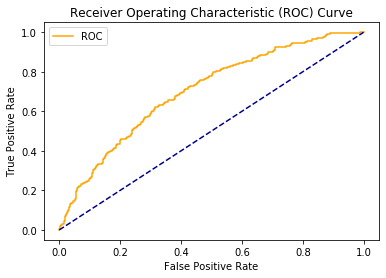

In [81]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [83]:
y.value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## Classification Report

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       1.00      0.00      0.01       305

    accuracy                           0.84      1916
   macro avg       0.92      0.50      0.46      1916
weighted avg       0.87      0.84      0.77      1916



#### From the above data, 0 values are almost predicted good. f1-score is 0.91
#### But not the 1 values
